# Bank Debt Collection Analysis

![image](https://catholicradionetwork.org/wp-content/uploads/2022/12/World-Bank.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Downloading the Dataset

In [287]:
Bank_df = pd.read_csv('bank_data.csv')

In [290]:
Bank_df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


Displaying Columns in our dataset

In [40]:
Bank_df.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

## Data Preparation & Cleaning

In [41]:
Bank_df.shape

(1882, 6)

In [42]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


It is visible from this that no column contains any Nan values as the non-null count equals to the shape of the dataset

In [43]:
Bank_df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


1) Expected recovery amount ranges from 194 to 9964
2) Actual recovery amount ranges from 200 to 34398
3) Ages range from 18 to 84
4) 2 of the other columns are of object type

In [12]:
Bank_df.recovery_strategy.value_counts()

Level 1 Recovery    670
Level 3 Recovery    368
Level 2 Recovery    333
Level 4 Recovery    264
Level 0 Recovery    247
Name: recovery_strategy, dtype: int64

In [13]:
Bank_df.sex.value_counts()

Male      973
Female    909
Name: sex, dtype: int64

Converting Object columns into integar type 

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [291]:
encoder = OneHotEncoder(categories=[["Female", "Male"]])
encoded_data = encoder.fit_transform(Bank_df[["sex"]]).toarray()

In [292]:
assigned_categories = encoder.categories_

In [271]:
encoded_df

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1877,1.0,0.0
1878,1.0,0.0
1879,1.0,0.0
1880,1.0,0.0


In [293]:
encoded_df = pd.DataFrame(encoded_data, columns=["Female", "Male"])

In [294]:
Bank_df = Bank_df.drop(['sex'], axis=1)

In [295]:
Bank_df = Bank_df.join(encoded_df)

In [296]:
Bank_df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,Female,Male
0,2030,194,263.540000,Level 0 Recovery,19,0.0,1.0
1,1150,486,416.090000,Level 0 Recovery,25,1.0,0.0
2,380,527,429.350000,Level 0 Recovery,27,0.0,1.0
3,1838,536,296.990000,Level 0 Recovery,25,0.0,1.0
4,1995,541,346.385000,Level 0 Recovery,34,0.0,1.0
...,...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,1.0,0.0
1878,196,9857,9709.909257,Level 4 Recovery,68,1.0,0.0
1879,313,9859,30209.181790,Level 4 Recovery,58,1.0,0.0
1880,1781,9920,20386.232190,Level 4 Recovery,67,1.0,0.0


In [297]:
encoder = OneHotEncoder(categories=[["Level 0 Recovery", "Level 1 Recovery", "Level 2 Recovery" ,"Level 3 Recovery" , "Level 4 Recovery" ]])
encoded_data = encoder.fit_transform(Bank_df[["recovery_strategy"]]).toarray()

In [298]:
assigned_categories = encoder.categories_

In [299]:
print("Assigned Categories:", assigned_categories)

Assigned Categories: [array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)]


In [300]:
encoded_df = pd.DataFrame(encoded_data, columns=['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'])

In [301]:
Bank_df= Bank_df.join(encoded_df)

In [302]:
Bank_df = Bank_df.drop('recovery_strategy', axis=1)

In [303]:
Bank_df

,id,expected_recovery_amount,actual_recovery_amount,age,Female,Male,Level 0 Recovery,Level 1 Recovery,Level 2 Recovery,Level 3 Recovery,Level 4 Recovery
0,2030,194,263.540000,19,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1150,486,416.090000,25,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,380,527,429.350000,27,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1838,536,296.990000,25,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1995,541,346.385000,34,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1877,361,9785,15388.195990,65,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1878,196,9857,9709.909257,68,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1879,313,9859,30209.181790,58,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1880,1781,9920,20386.232190,67,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Exploratory Analysis & Visualization

Lets check the amount of people in different level of recovery strategies

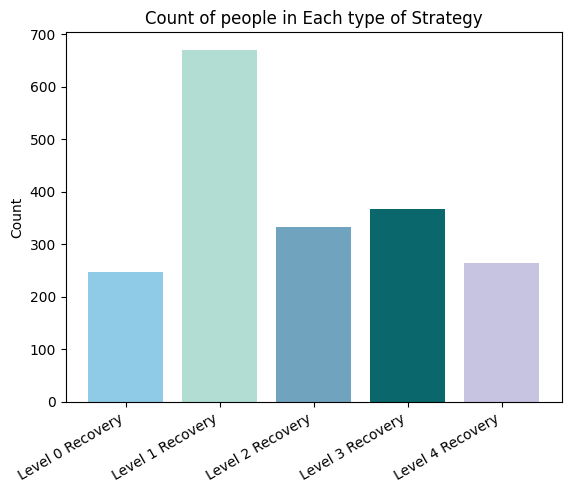

In [79]:
sum_values = encoded_df.sum()
fig, ax = plt.subplots()
x = np.arange(len(sum_values))
ax.bar(x, sum_values)
colors = ['#8fcae7', '#b1ddd3', '#70a3bd', '#0a676c', '#c6c4e1']
ax.bar(x, sum_values, color=colors)
ax.set_xticks(x)
ax.set_xticklabels(sum_values.index, rotation=30, ha='right')
ax.set_ylabel('Count')
ax.set_title('Count of people in Each type of Strategy')
plt.show()

Checking the number of Males and Females in the dataset

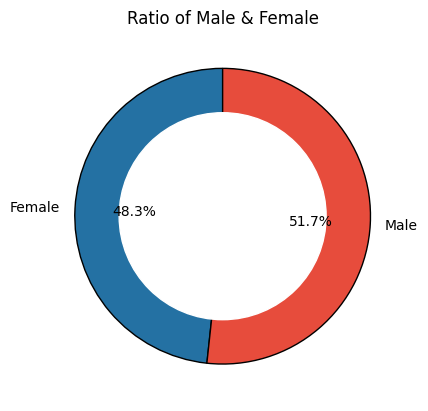

In [86]:
sums = encoded_df.sum()
labels = ['Female' , 'Male']
fig, ax = plt.subplots()
color = ['#2471A3', '#E74C3C']
ax.pie(sums, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, colors = color)
circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)
ax.set_aspect('equal')
ax.set_title('Ratio of Male & Female')
plt.show()

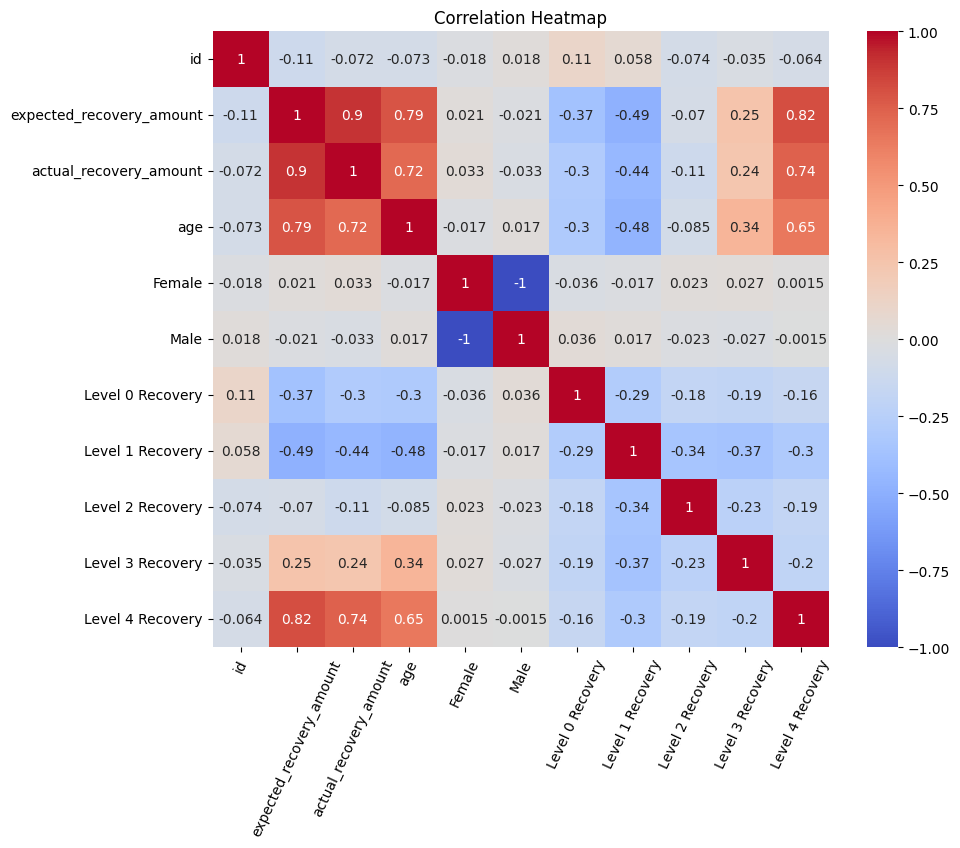

In [129]:
corr_matrix = Bank_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=65)
plt.yticks(rotation=0)
plt.show()

### Age Vs Expected Recovery Amount

Trying to see the changes in the ages from level 0 to level 1

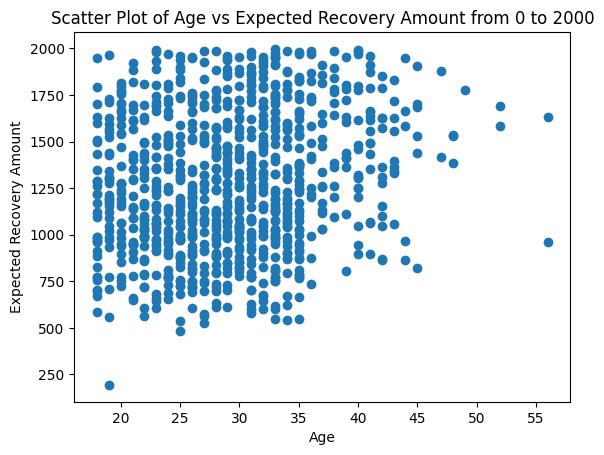

In [308]:
new_df = Bank_df[Bank_df['expected_recovery_amount'].between(0, 2000)]
plt.scatter(new_df['age'],new_df['expected_recovery_amount'])
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')
plt.title('Scatter Plot of Age vs Expected Recovery Amount from 0 to 2000')
plt.show()

### Statistical Analysis of Age Vs Expected Recovery Amount between 900 to 1100

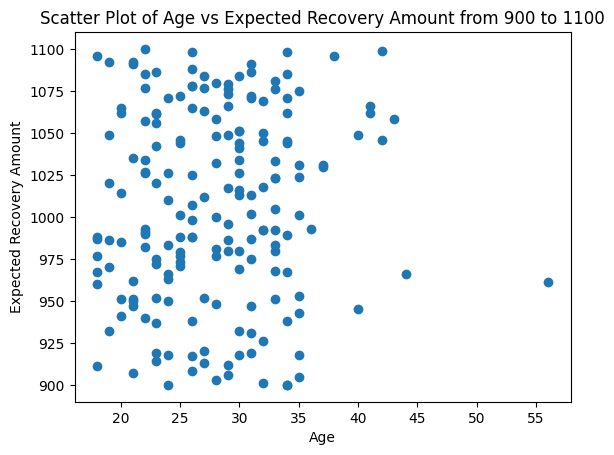

In [324]:
new_df = Bank_df[Bank_df['expected_recovery_amount'].between(900, 1100)]
plt.scatter(new_df['age'],new_df['expected_recovery_amount'])
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')
plt.title('Scatter Plot of Age vs Expected Recovery Amount from 900 to 1100')
plt.show()

In [325]:
import scipy.stats as stats

age_mean = new_df['age'].mean()
recovery_amount_mean = new_df['expected_recovery_amount'].mean()
print('Mean of age ' , age_mean, ',  Mean of recovery amount' , recovery_amount_mean)

age_median = new_df['age'].median()
recovery_amount_median = new_df['expected_recovery_amount'].median()
print('Median of age ' , age_median, ',  Median of recovery amount' , recovery_amount_median)

age_std = new_df['age'].std()
recovery_amount_std = new_df['expected_recovery_amount'].std()
print('STD of age ' , age_std, ',  STD of recovery amount' , recovery_amount_std)

age_min = new_df['age'].min()
recovery_amount_min = new_df['expected_recovery_amount'].min()
print('Minimum of age ' , age_min, ',  Minimum of recovery amount' , recovery_amount_min)

age_max = new_df['age'].max()
recovery_amount_max = new_df['expected_recovery_amount'].max()
print('Maximum of age ' , age_max, ',  Maximum of recovery amount' , recovery_amount_max)

Mean of age  27.97826086956522 ,  Mean of recovery amount 1005.9782608695652
Median of age  28.0 ,  Median of recovery amount 1003.5
STD of age  6.1581671051953135 ,  STD of recovery amount 56.892282123895384
Minimum of age  18 ,  Minimum of recovery amount 900
Maximum of age  56 ,  Maximum of recovery amount 1100


In [319]:
new_df['age'].corr(new_df['expected_recovery_amount'])

0.19753517763945053

In [133]:
group1 = Bank_df[(Bank_df['expected_recovery_amount'] > 900) & (Bank_df['expected_recovery_amount'] < 1000)]['age']
group2 = Bank_df[(Bank_df['expected_recovery_amount'] > 1000) & (Bank_df['expected_recovery_amount'] < 1100)]['age']
t_statistic, p_value = stats.ttest_ind(group1, group2)
print('T-Test')
print(t_statistic)
print(p_value)

T-Test
-1.8049191736079915
0.07278701029702841


In [134]:
statistic, p_value = stats.kruskal(group1 , group2)
print('Kruskal-Wallis Test')
print(statistic)
print(p_value)

Kruskal-Wallis Test
4.08264377430719
0.04332581875965795


### Statistical Analysis of Sex Vs Expected Recovery Amount between 900 to 1100

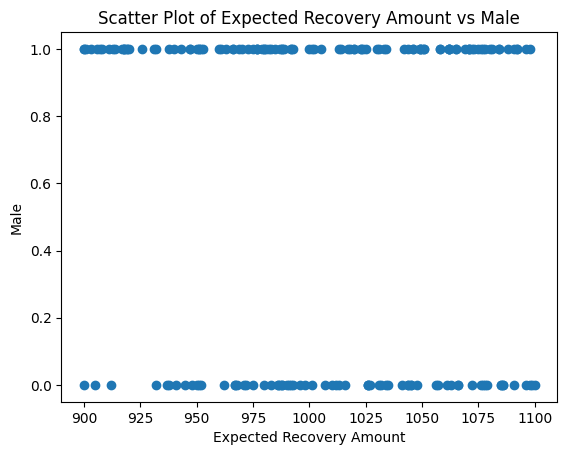

In [326]:
plt.scatter(new_df['expected_recovery_amount'], new_df['Male'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Male')
plt.title('Scatter Plot of Expected Recovery Amount vs Male')
plt.show()

In [327]:

male_mean = new_df['Male'].mean()
recovery_amount_mean = new_df['expected_recovery_amount'].mean()
print('Mean of Male:', male_mean, ', Mean of Expected Recovery Amount:', recovery_amount_mean)

male_median = new_df['Male'].median()
recovery_amount_median = new_df['expected_recovery_amount'].median()
print('Median of Male:', male_median, ', Median of Expected Recovery Amount:', recovery_amount_median)

male_std = new_df['Male'].std()
recovery_amount_std = new_df['expected_recovery_amount'].std()
print('Standard Deviation of Male:', male_std, ', Standard Deviation of Expected Recovery Amount:', recovery_amount_std)

male_min = new_df['Male'].min()
recovery_amount_min = new_df['expected_recovery_amount'].min()
print('Minimum of Male:', male_min, ', Minimum of Expected Recovery Amount:', recovery_amount_min)

male_max = new_df['Male'].max()
recovery_amount_max = new_df['expected_recovery_amount'].max()
print('Maximum of Male:', male_max, ', Maximum of Expected Recovery Amount:', recovery_amount_max)


Mean of Male: 0.6086956521739131 , Mean of Expected Recovery Amount: 1005.9782608695652
Median of Male: 1.0 , Median of Expected Recovery Amount: 1003.5
Standard Deviation of Male: 0.4893738999681779 , Standard Deviation of Expected Recovery Amount: 56.892282123895384
Minimum of Male: 0.0 , Minimum of Expected Recovery Amount: 900
Maximum of Male: 1.0 , Maximum of Expected Recovery Amount: 1100


In [328]:
male_data = Bank_df[Bank_df['Male'] == 1]['expected_recovery_amount']
reference_value = 1000
t_statistic, p_value = stats.ttest_1samp(male_data, reference_value)
print('T-Test:')
print(t_statistic)
print(p_value)

T-Test:
26.1975313570861
7.0326816567641045e-115


In [127]:
statistic, p_value = stats.kruskal(filtered_df['Male'], filtered_df['expected_recovery_amount'])
print('Kruskal-Wallis Test')
print(statistic)
print(p_value)

Kruskal-Wallis Test
285.4389663495272
4.902200083069858e-64


### Exploratory Graphical Analysis : Recovery Amount

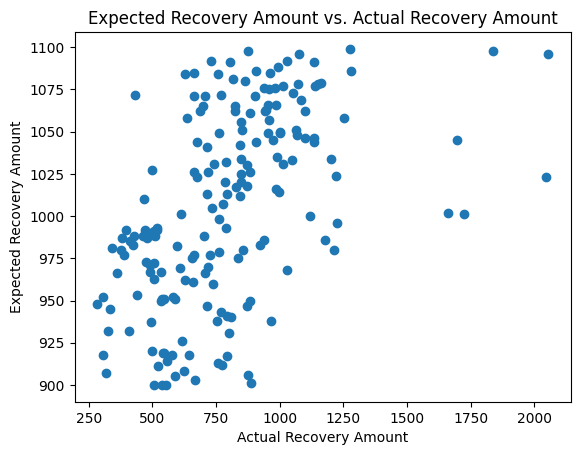

In [443]:
new_df = Bank_df[(Bank_df['expected_recovery_amount'] >= 900) & (Bank_df['expected_recovery_amount'] < 1100)]
plt.scatter(new_df['actual_recovery_amount'], new_df['expected_recovery_amount'])
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')
plt.title('Expected Recovery Amount vs. Actual Recovery Amount')
plt.show()

### Statistical Analysis: Recovery Amount

In [143]:
group1 = Bank_df[(Bank_df['expected_recovery_amount'] >= 900) & (Bank_df['expected_recovery_amount'] <= 1000)]['actual_recovery_amount']
group2 = Bank_df[(Bank_df['expected_recovery_amount'] > 1000) & (Bank_df['expected_recovery_amount'] <= 1100)]['actual_recovery_amount']
group3 = Bank_df[(Bank_df['expected_recovery_amount'] >= 950) & (Bank_df['expected_recovery_amount'] <= 1000)]['actual_recovery_amount']
group4 = Bank_df[(Bank_df['expected_recovery_amount'] > 1000) & (Bank_df['expected_recovery_amount'] <= 1050)]['actual_recovery_amount']

statistic1, p_value1 = stats.kruskal(group1, group2)
statistic2, p_value2 = stats.kruskal(group3, group4)

print("Statistics and the P-value for the amount between 900 and 1100 are : ", statistic1," and ", p_value1)
print("Statistics and the P-value for the amount between 950 and 1050 are : ", statistic2,"and ", p_value2)

Statistics and the P-value for the amount between 900 and 1100 are :  64.89840778685254  and  7.886077128395961e-16
Statistics and the P-value for the amount between 950 and 1050 are :  30.9924872487249 and  2.5902913533269003e-08


## Regression Modelling : No Threshold

In [442]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [405]:
model1 = LinearRegression()
X = new_df['expected_recovery_amount']
y = new_df['actual_recovery_amount']
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
model1.fit(X,y)

LinearRegression()

In [406]:
y_predictions = model1.predict(X)

In [407]:
coefficients = model1.coef_[0]
intercept = model1.intercept_[0]

In [408]:
r_squared = r2_score(y,y_predictions)
z = X.shape[0]
s = X.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (z - 1) / (z - s - 1)

In [420]:
print("Coefficients: ", coefficients)
print("Intercept: ", intercept)
print("R-squared: ", r_squared)
print("Adjusted R-squared: ", adjusted_r_squared)

Coefficients:  [  0.6429831  277.63441877]
Intercept:  3.344024967607538
R-squared:  0.26055416614656146
Adjusted R-squared:  0.2523381013259677


In [410]:
mean_squared_error(y_predictions , y)

68806.51675613894

## Regression Modeling : Adding True Threshold 

In [457]:
threshold = 1000
new_df['threshold'] = (new_df['expected_recovery_amount'] >= 1000).astype(int)
model2 = LinearRegression()

C:\Users\Asus\AppData\Local\Temp\ipykernel_25968\685344094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['threshold'] = (new_df['expected_recovery_amount'] >= 1000).astype(int)


In [458]:
new_df

,id,expected_recovery_amount,actual_recovery_amount,age,Female,Male,Level 0 Recovery,Level 1 Recovery,Level 2 Recovery,Level 3 Recovery,Level 4 Recovery,threshold
192,1619,950,883.790000,21,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
193,1898,950,534.910000,24,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
194,212,951,543.780000,33,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
195,1329,951,537.985000,20,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
196,1751,951,589.435000,21,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
286,1497,1046,1134.471732,25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
287,1557,1048,1068.511941,28,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
288,192,1049,955.913183,19,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
289,1086,1049,760.897712,29,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


In [446]:
X = new_df[['expected_recovery_amount', 'threshold']]
y = new_df['actual_recovery_amount']

In [447]:
X = X.values.reshape(-1, 2)
y = y.values.reshape(-1, 1)

In [448]:
model2.fit(X,y)

LinearRegression()

In [449]:
y2_predictions = model2.predict(X)

In [450]:
coefficients = model2.coef_[0]
intercept = model2.intercept_[0]
r_squared2 = r2_score(y,y2_predictions)
z = X.shape[0]
s = X.shape[1]
adjusted_r_squared = 1 - (1 - r_squared2) * (z - 1) / (z - s - 1)

In [451]:
print("Coefficients: ", coefficients)
print("Intercept: ", intercept)
print("R-squared: ", r_squared2)
print("Adjusted R-squared: ", adjusted_r_squared)

Coefficients:  [  0.6429831  277.63441877]
Intercept:  3.344024967607538
R-squared:  0.3141270744516168
Adjusted R-squared:  0.30650626416774585


In [419]:
mean_squared_error(y2_predictions, y)

63821.47925344946

## Adjusting Window For both No Threshold & True Threshold

In [459]:
new_df = Bank_df[(Bank_df['expected_recovery_amount'] >= 950) & (Bank_df['expected_recovery_amount'] < 1050)]

In [453]:
model3 = LinearRegression()
X = new_df['expected_recovery_amount']
y = new_df['actual_recovery_amount']
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
model3.fit(X,y)
y_predictions = model3.predict(X)
coefficients = model3.coef_[0]
intercept = model3.intercept_[0]
r_squared3 = r2_score(y,y_predictions)
z = X.shape[0]
s = X.shape[1]
adjusted_r_squared = 1 - (1 - r_squared3) * (z - 1) / (z - s - 1)

In [454]:
print("Coefficients: ", coefficients)
print("Intercept: ", intercept)
print("R-squared: ", r_squared3)
print("Adjusted R-squared: ", adjusted_r_squared)

Coefficients:  [5.15554052]
Intercept:  -4381.780840506411
R-squared:  0.23405179729327685
Adjusted R-squared:  0.22615542406949618


In [463]:
model4 = LinearRegression()
new_df['threshold'] = (new_df['expected_recovery_amount'] >= 1000).astype(int)
X = new_df[['expected_recovery_amount', 'threshold']]
y = new_df['actual_recovery_amount']
X = X.values.reshape(-1, 2)
y = y.values.reshape(-1, 1)
model4.fit(X,y)
y4_predictions = model4.predict(X)
coefficients = model4.coef_[0]
intercept = model4.intercept_[0]
r_squared4 = r2_score(y,y4_predictions)
z = X.shape[0]
s = X.shape[1]
adjusted_r_squared = 1 - (1 - r_squared4) * (z - 1) / (z - s - 1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25968\121347414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['threshold'] = (new_df['expected_recovery_amount'] >= 1000).astype(int)


In [462]:
print("Coefficients: ", coefficients)
print("Intercept: ", intercept)
print("R-squared: ", r_squared4)
print("Adjusted R-squared: ", adjusted_r_squared)

Coefficients:  [  0.91893319 286.53365284]
Intercept:  -279.52430066671684
R-squared:  0.28347339242199177
Adjusted R-squared:  0.2685457547641166
